In [25]:
import cv2
import numpy
import matplotlib.pyplot as plt
import random

In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

### read an image

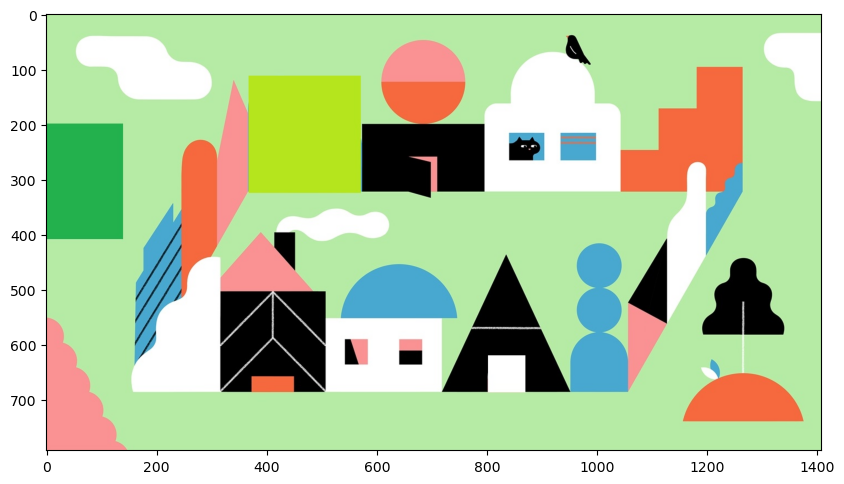

In [27]:
image = cv2.imread("../Image/buildings.jpg")
plt.imshow(image[:,:,::-1])

## first level
### insert some random-colored circles on the image

In [28]:
def insert_circles(image):
    num_circles = 2
    circles = []
    while len(circles) < num_circles:
        center = tuple(
            numpy.random.randint(0, high = image.shape[1] if image.shape[1] < image.shape[0] else image.shape[0], size=(2,)))
        radius = numpy.random.randint(10, 20)
        circle = (center, radius)
        # check if the new circle intersects with any of the previous circles
        is_intersecting = False
        for other_circle in circles:
            distance = ((other_circle[0][0] - center[0])**2 + (other_circle[0][1] - center[1])**2)**0.5
            if distance < other_circle[1] + radius + 50:
                is_intersecting = True
                break
        if not is_intersecting:
            r = numpy.random.randint(0, 255)
            g = numpy.random.randint(0, 255)
            b = numpy.random.randint(0, 255)
            color = (0, 0, 0)
            cv2.circle(image, center, radius, color, -1)
            circles.append(circle)
    return image

In [29]:
copy_image = numpy.copy(image)
inserted_image = insert_circles(copy_image)

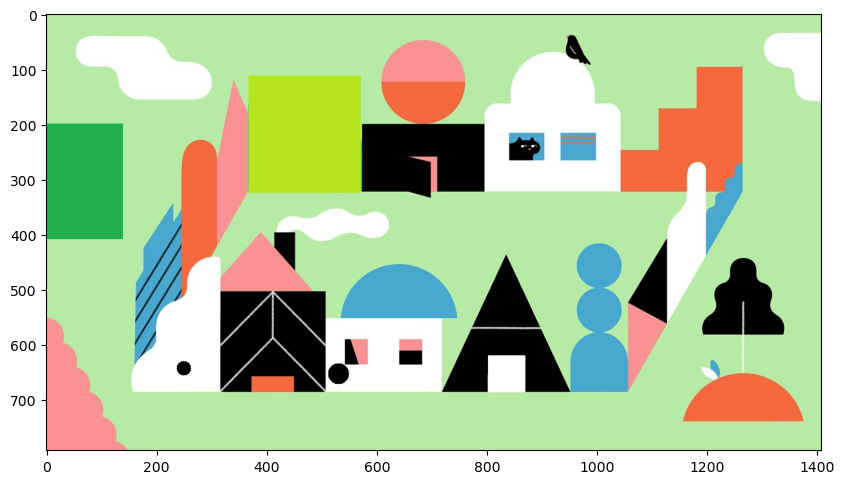

In [30]:
plt.imshow(inserted_image[:,:,::-1])

## second level
### Change color of some objects

#### find the edges in the picture using Canny Edge detector

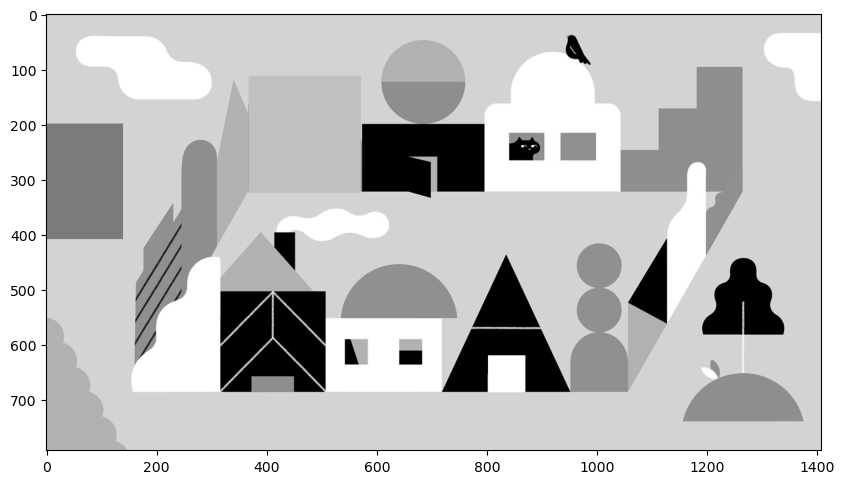

In [31]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = 'gray')

In [32]:
edge_image = cv2.Canny(gray_image, 80 , 250)

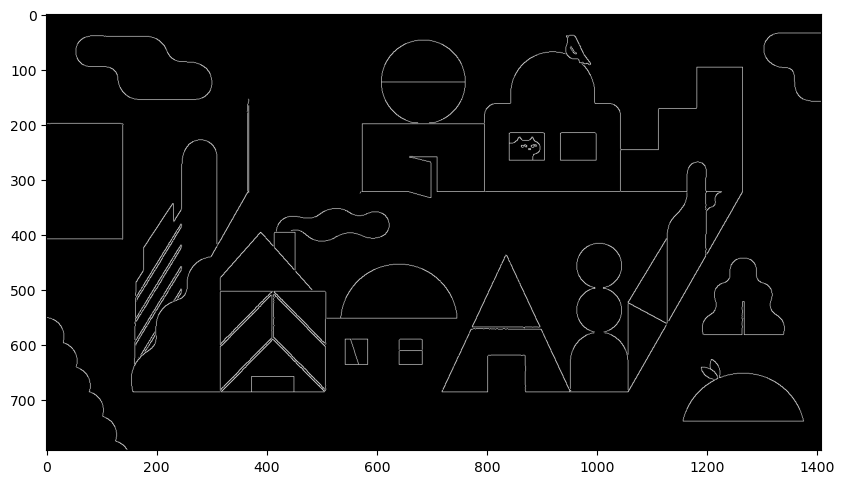

In [33]:
plt.imshow(edge_image, cmap = 'gray')

In [34]:
contours , _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [35]:
gray = numpy.zeros((image.shape[0], image.shape[1], 3), dtype = "uint8")
for x in contours :
    cv2.fillPoly(gray, pts = [x] , color = [255,255,255])

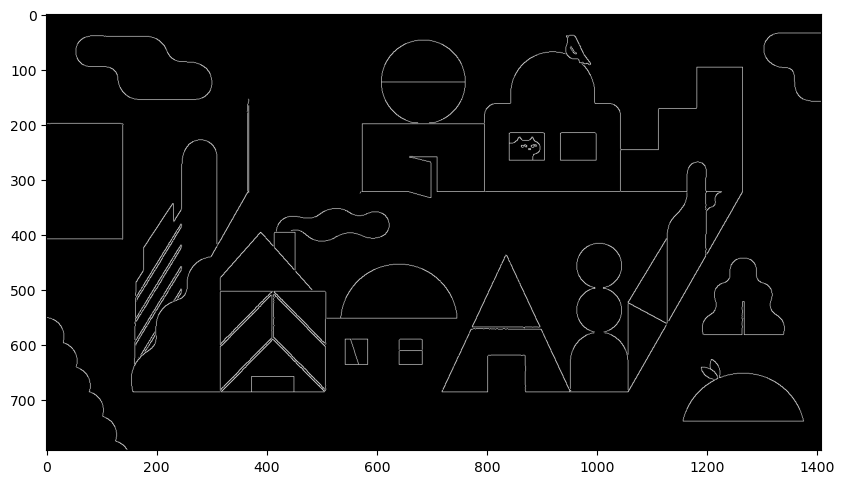

In [36]:
plt.imshow(edge_image, cmap = "gray")

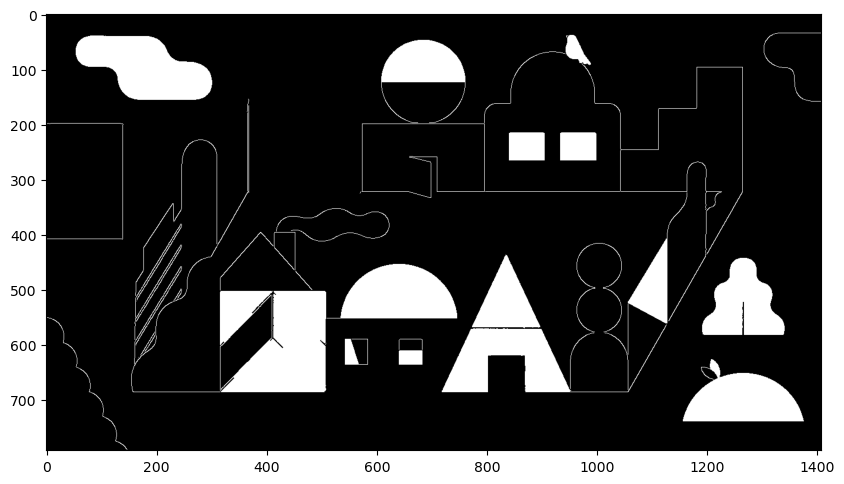

In [37]:
plt.imshow(gray, cmap = "gray")

In [38]:
preprocessing = cv2.medianBlur(gray,9)
edge_image = cv2.Canny(preprocessing, 40 , 200)
contours, _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

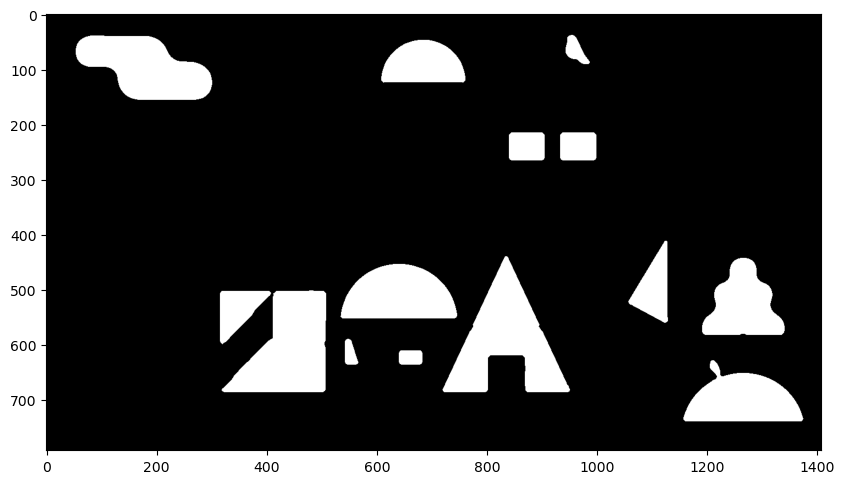

In [39]:
plt.imshow(preprocessing, cmap='gray')

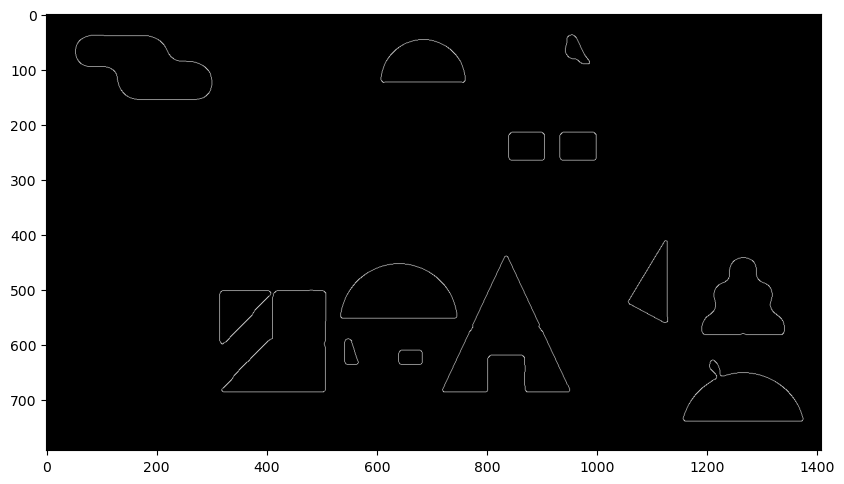

In [40]:
plt.imshow(edge_image, cmap='gray')

In [41]:
random_contour = random.sample(contours, 5)

In [42]:
copy_image = numpy.copy(image)
for contour in random_contour:
    color = (numpy.random.randint(0, 255),numpy.random.randint(0, 255),numpy.random.randint(0, 255))
    cv2.fillPoly(copy_image,pts=[contour],color=color)

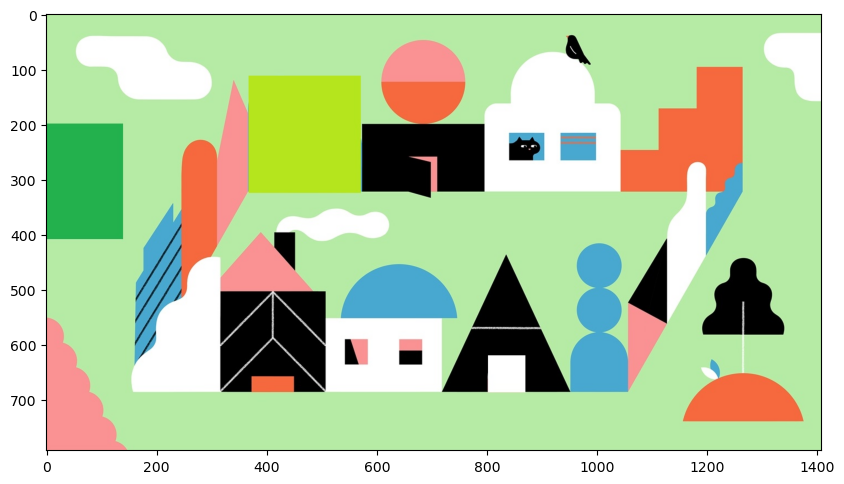

In [43]:
plt.imshow(image[:,:,::-1])

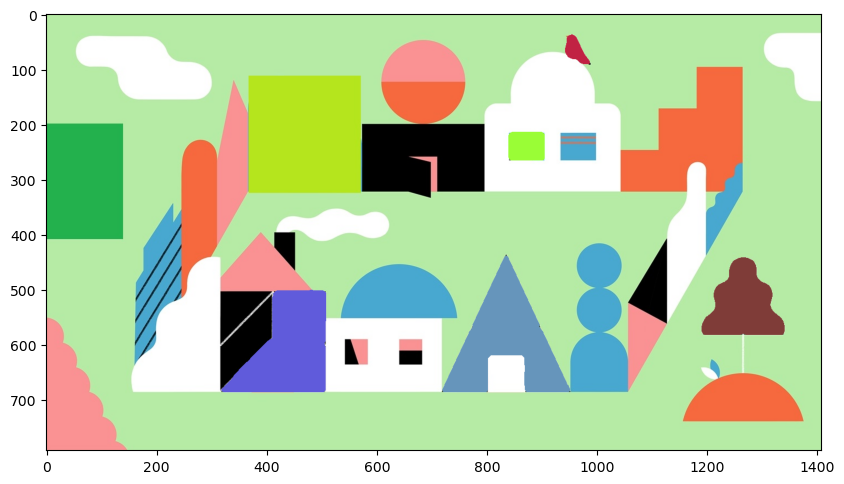

In [44]:
plt.imshow(copy_image[:,:,::-1])

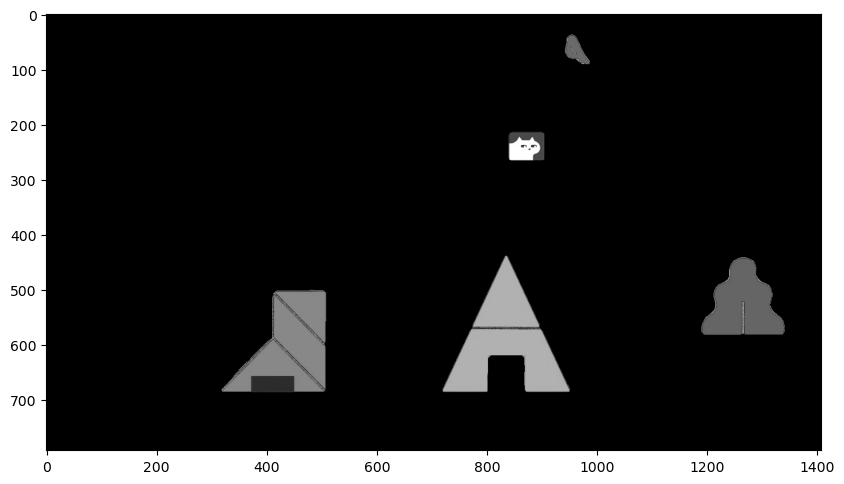

In [45]:

grey1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey2 = cv2.cvtColor(copy_image, cv2.COLOR_BGR2GRAY)
image_diff = cv2.absdiff(grey1,grey2)
plt.imshow(image_diff, cmap = 'gray')

In [46]:
_ , thresh = cv2.threshold(image_diff, 30 , 255 , cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

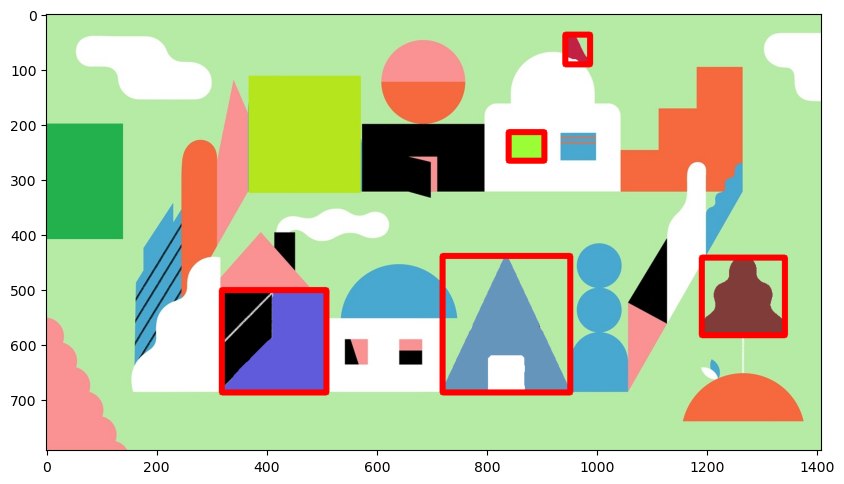

In [47]:
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(copy_image, (x,y) , (x+w,y+h),(0,0,255),10)

plt.imshow(copy_image[:,:,::-1])

In [48]:
print(len(contours))

5
